***CHARMI YASHWANT KANANI***

***GO_STP_755***



### Create a Model using Naive Bayes classifiers to predict whether a passenger on the titanic would have been survived or not.



Naive Bayes classifiers are built on Bayesian classification methods. These rely on Bayes's theorem, which is an equation describing the relationship of conditional probabilities of statistical quantities.

Link: https://www.kaggle.com/c/titanic/data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/train (1).csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


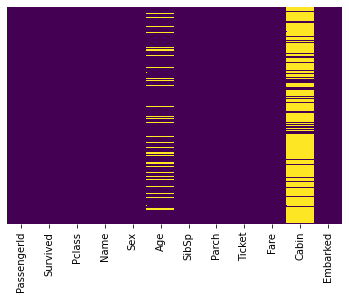

In [ ]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [ ]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
del df['PassengerId']
del df['Name']
del df['Ticket']
del df['Cabin']

In [ ]:
df.shape

(891, 8)

In [ ]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


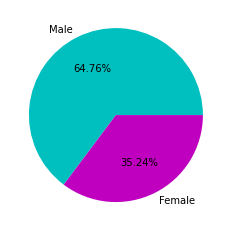

In [ ]:
a = df['Sex'].value_counts()
plt.pie(a, labels = ['Male', 'Female'], colors = ['c','m'],autopct='%1.2f%%')
plt.show()

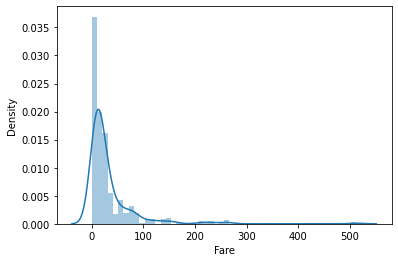

In [ ]:
sns.distplot(df['Fare'])

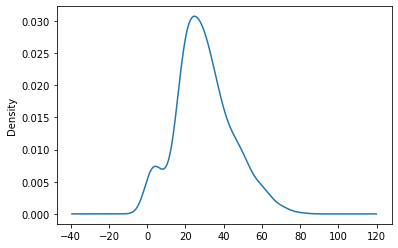

In [ ]:
df['Age'].plot.kde()

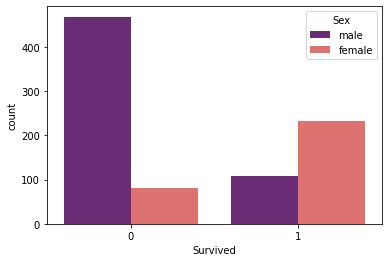

In [ ]:
sns.countplot(x = "Survived", hue = "Sex", data = df, palette = 'magma')

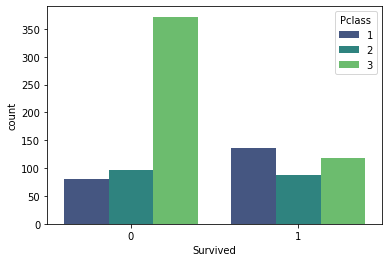

In [ ]:
sns.countplot(x = "Survived", hue = "Pclass", data = df, palette = 'viridis')

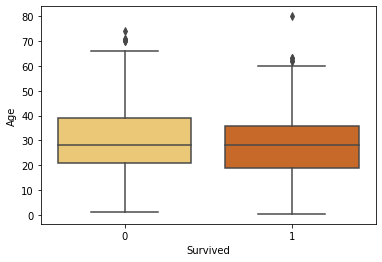

In [ ]:
sns.boxplot(x = 'Survived', y = 'Age', data = df, palette = 'YlOrBr')

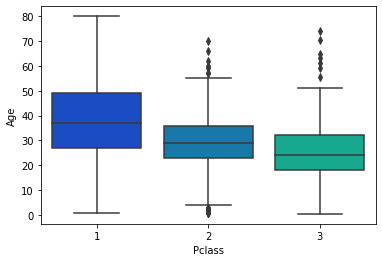

In [ ]:
sns.boxplot(x = 'Pclass', y = 'Age', data = df, palette = 'winter')

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


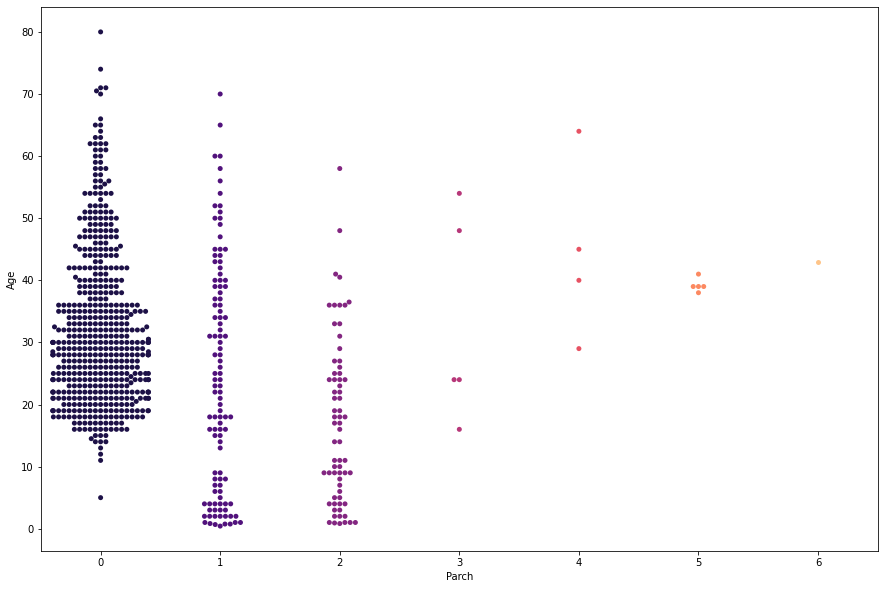

In [ ]:
plt.figure(figsize=(15,10))
sns.swarmplot(x = "Parch", y = "Age", data = df, palette = 'magma')

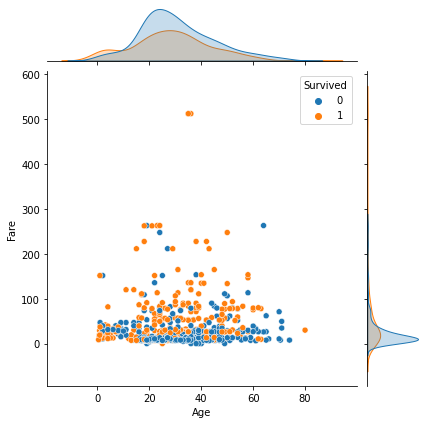

In [ ]:
sns.jointplot(x = 'Age', y = 'Fare', hue = 'Survived', data = df)

In [ ]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

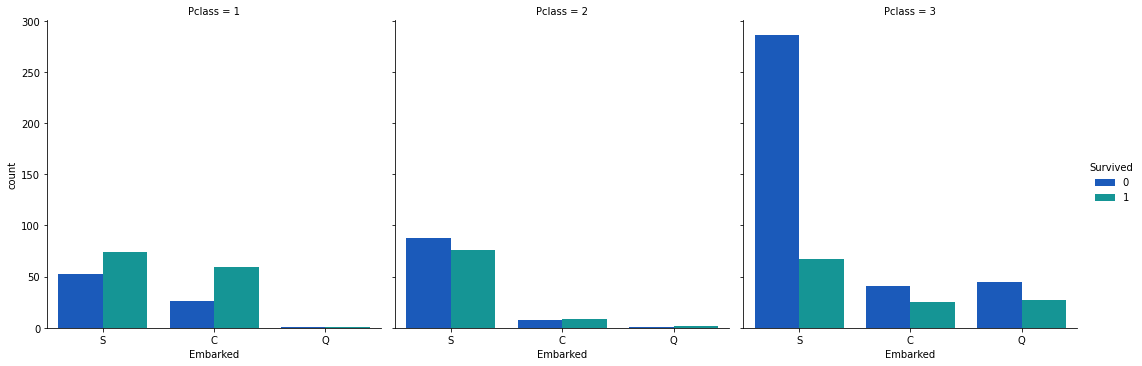

In [ ]:
sns.catplot(x ='Embarked', col ='Pclass', hue ='Survived', kind ='count',  data = df, palette = 'winter')

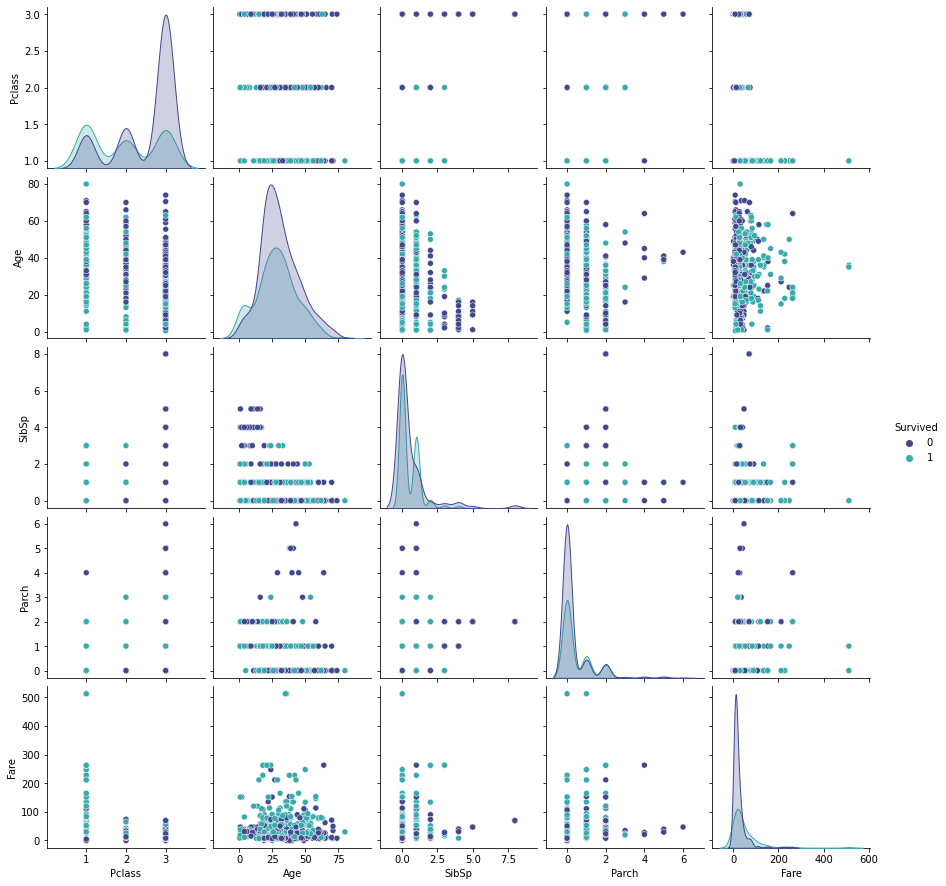

In [ ]:
sns.pairplot(df, hue = 'Survived', palette = 'mako')

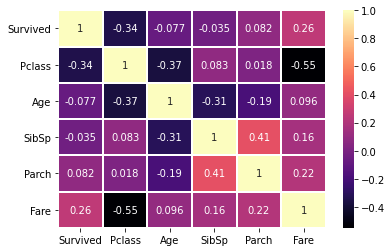

In [ ]:
sns.heatmap(df.corr(), linewidths=1, annot = True, cmap = 'magma')

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
df['Survived'].value_counts(normalize = True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [ ]:
var = pd.get_dummies(df['Sex'], drop_first = True)
df = df.join(var) 
df.drop('Sex', axis = 1, inplace = True)

In [ ]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [ ]:
var1 = pd.get_dummies(df['Embarked'], drop_first = True)
df = df.join(var1) 
df.drop('Embarked', axis = 1, inplace = True)

In [ ]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [ ]:
X = df.drop(['Survived'], axis = 1)
y = df['Survived']

In [ ]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
male        0
Q           0
S           0
dtype: int64

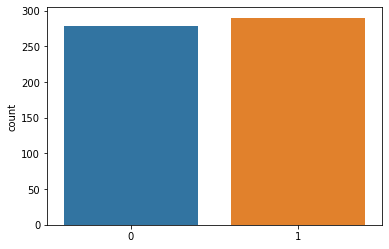

In [ ]:
from imblearn.combine import SMOTEENN
sme = SMOTEENN(random_state = 42)
X1, y1 = sme.fit_resample(X, y)
sns.countplot(y1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[81, 10],
       [ 5, 75]])

In [ ]:
acc = accuracy_score(y_test, y_pred)
acc

0.9122807017543859